In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hit
import device
from plotting import correlate, plot_events
import yaml

In [2]:
with open('setup.yml', "r") as file:
    setup = yaml.full_load(file)

with open('material.yml', "r") as file:
    material = yaml.full_load(file)

In [3]:
folder = setup['data_output']

device_material = [setup['deviceses'][dev]['material'] for dev in setup['deviceses']]
materials = [material[device_material[i]] for i in range(len(device_material))]
names = [dev for dev in setup['deviceses']]

devicess = [setup['deviceses'][dev] for dev in setup['deviceses']]
beam = setup['beam']
hit_tables = hit.tracks(beam, devicess, materials)
device.calculate_device_hit(beam, devicess, hit_tables, names, folder)

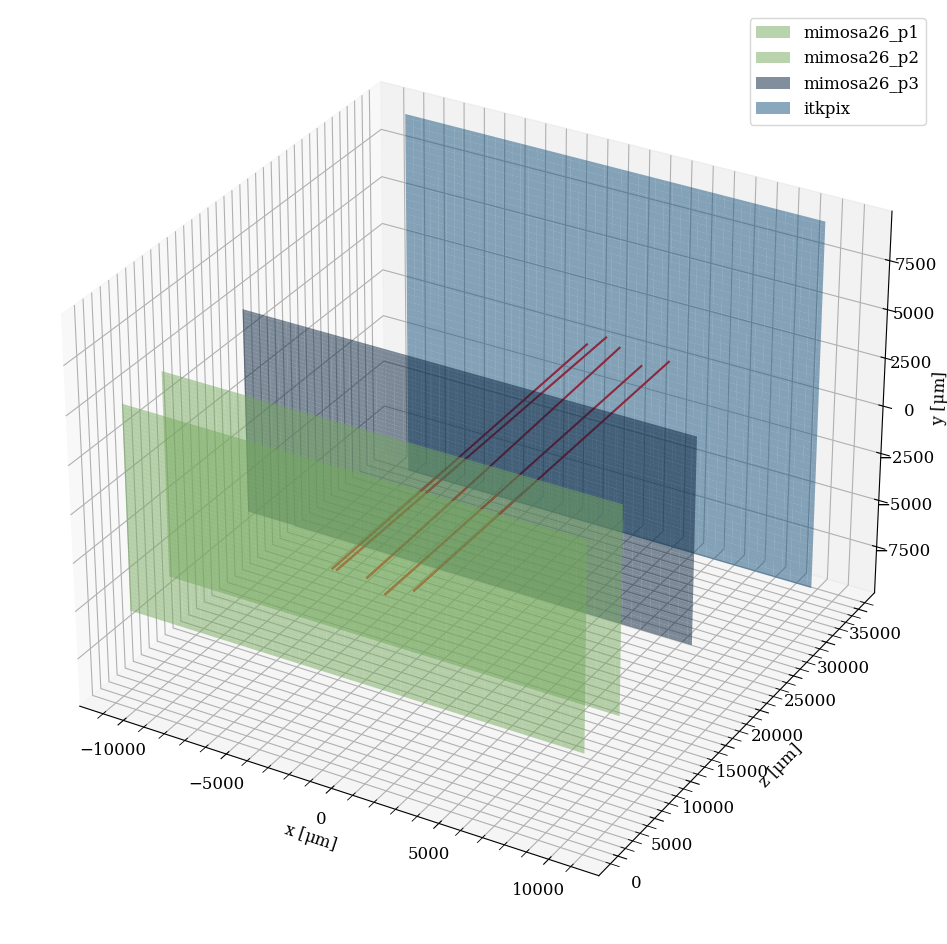

In [4]:
plot_events(devicess, names, hit_tables, np.arange(60, 65, 1))

In [5]:
# fiel_dut_1 = '/home/rasmus/Documents/pieces of interest/output_pytestbeam/1_dut.h5'
# fiel_dut_2 = '/home/rasmus/Documents/pieces of interest/output_pytestbeam/2_dut.h5'

# correlate(fiel_dut_1, fiel_dut_2, dut_2, dut_3)